# **P4/ Anticipez les besoins en consommation de bâtiments**

## **Introduction**

In [64]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [66]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

In [68]:
# Chargement + affichage de la base de données
data = pd.read_csv('data_nettoyer_test2.csv')
data.head(100)

,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),TotalGHGEmissions,ParkingProportion,EnergyDensity,ElectricityPerTotalGFA,NaturalGasPerTotalGFA,BuildingType_Nonresidential COS,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Logement,PrimaryPropertyType_Loisir,PrimaryPropertyType_Magasin,PrimaryPropertyType_Offices,PrimaryPropertyType_Others,PrimaryPropertyType_Sante,LargestPropertyUseType_Logement,LargestPropertyUseType_Loisir,LargestPropertyUseType_Magasin,LargestPropertyUseType_Offices,LargestPropertyUseType_Others,LargestPropertyUseType_Sante,SecondLargestPropertyUseType_Logement,SecondLargestPropertyUseType_Loisir,SecondLargestPropertyUseType_Magasin,SecondLargestPropertyUseType_Offices,SecondLargestPropertyUseType_Others,SecondLargestPropertyUseType_Sante,ThirdLargestPropertyUseType_Logement,ThirdLargestPropertyUseType_Loisir,ThirdLargestPropertyUseType_Magasin,ThirdLargestPropertyUseType_Offices,ThirdLargestPropertyUseType_Others,ThirdLargestPropertyUseType_Sante,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,SiteEnergyUseWN(kBtu)Log2
0,47.61220,-122.33799,1927.0,1.0,12.0,0.0,88434.0,88434.0,29369.20000,7729.200000,60.0,84.300003,189.000000,249.98,0.000000,84.321754,44.621152,1.443396e+01,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,22.830147
1,47.61317,-122.33393,1996.0,1.0,11.0,15064.0,88502.0,83880.0,15064.00000,4622.000000,61.0,97.900002,179.399994,295.86,0.145453,97.901505,31.311927,4.967926e+01,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,23.046682
2,47.61393,-122.33810,1969.0,1.0,41.0,196718.0,759392.0,756493.0,156171.80000,53704.800000,43.0,97.699997,244.100006,2089.28,0.205748,97.363565,51.800174,1.562373e+00,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,26.139795
3,47.61412,-122.33664,1926.0,1.0,10.0,0.0,61320.0,61320.0,25258.00000,7372.200000,56.0,113.300003,224.000000,286.43,0.000000,113.287679,45.155316,2.953707e+01,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,22.727917
4,47.61375,-122.34047,1980.0,1.0,18.0,62000.0,113580.0,123445.0,68009.00000,0.000000,75.0,118.699997,215.600006,505.01,0.353115,129.041231,30.576415,5.014237e+01,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,23.805038
5,47.61623,-122.33657,1999.0,1.0,2.0,37198.0,60090.0,88830.0,29026.00000,9706.800000,15.6,141.600006,320.500000,301.81,0.382349,209.381128,75.769201,4.846622e+01,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,23.584825
6,47.61390,-122.33283,1926.0,1.0,11.0,0.0,83008.0,81352.0,20440.40000,8

In [69]:
data.shape

(1515, 58)

In [70]:
data = data.drop(columns=['SiteEnergyUseWN(kBtu)Log2'])

In [71]:
data.shape

(1515, 57)

In [72]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Identifier les colonnes numériques
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns

# Normalisation
scaler = StandardScaler()  

# Appliquer la normalisation
scaled_data = scaler.fit_transform(data[numerical_columns])

# Reconvertir en DataFrame
data[numerical_columns] = pd.DataFrame(scaled_data, columns=numerical_columns)

# Vérifier les résultats
print(data.describe())

           Latitude     Longitude     YearBuilt  NumberofBuildings  \
count  1.515000e+03  1.515000e+03  1.515000e+03       1.515000e+03   
mean  -1.319780e-13  2.806855e-13 -3.193925e-15      -2.169149e-16   
std    1.000330e+00  1.000330e+00  1.000330e+00       1.000330e+00   
min   -2.279127e+00 -3.357233e+00 -1.875924e+00      -1.829547e+00   
25%   -6.138696e-01 -4.095277e-01 -9.626473e-01      -6.071246e-02   
50%   -7.951736e-02  1.979143e-02  1.028415e-01      -6.071246e-02   
75%    6.914964e-01  4.632781e-01  8.030199e-01      -6.071246e-02   
max    2.498410e+00  3.083413e+00  1.624968e+00       1.408996e+01   

       NumberofFloors  PropertyGFAParking  PropertyGFABuilding(s)  \
count    1.515000e+03        1.515000e+03            1.515000e+03   
mean     7.504082e-17        3.752041e-17           -3.752041e-17   
std      1.000330e+00        1.000330e+00            1.000330e+00   
min     -4.826279e-01       -3.152785e-01           -5.689680e-01   
25%     -4.826279e-01   

Testons 4 différents modèles de machine learning : Elastic-Net, XGBoost, Random Forest et SVM.

In [78]:
y = data[["TotalGHGEmissions"]]
X = data.drop(columns=["TotalGHGEmissions"])

### Regression + ElasticNet

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Entraîner le modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)   

# Évaluer les performances
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Afficher les résultats
print(f"Performance sur le jeu d'entraînement : R²={train_r2:.3f}, MAE={train_mae:.3f}, RMSE={train_rmse:.3f}")
print(f"Performance sur le jeu de test : R²={test_r2:.3f}, MAE={test_mae:.3f}, RMSE={test_rmse:.3f}")

Performance sur le jeu d'entraînement : R²=0.714, MAE=0.237, RMSE=0.463
Performance sur le jeu de test : R²=0.608, MAE=0.284, RMSE=0.789


C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [85]:
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet

# Entrainer le modèle
model = ElasticNet(alpha=0.5, l1_ratio=0.2, random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation des performances
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("R² :", r2)
print("RMSE :", rmse)
print("MAE :", mae)

R² : 0.38935269616099377
RMSE : 0.9841720675481385
MAE : 0.23958575180527833


In [89]:
y_test = np.ravel(y_test)  # Convertir en tableau 1D
y_pred = np.ravel(y_pred) 

In [92]:
# Calcul des résidus
residuals = y_test - y_pred


In [94]:
# Calculer les résidus
residuals = y_test - y_pred

# Moyenne des résidus
print(f"Moyenne des résidus : {np.mean(residuals):.4f}")

Moyenne des résidus : 0.0273


### XGBoosting

In [97]:
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialiser le modèle
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.3, max_depth=2, random_state=42)

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Prédire
y_pred = xgb_model.predict(X_test)

# Évaluer les performances
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Résultats
print("R² :", r2)
print("RMSE :", rmse)
print("MAE :", mae)

R² : 0.6958549152823857
RMSE : 0.6945703083048861
MAE : 0.13081503267552805


### Foret aléatoire

In [101]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [104]:
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
# Initialiser le modèle
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
rf_regressor.fit(X_train, y_train)

# Prédictions
y_pred = rf_regressor.predict(X_test)

# Évaluer les performances
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Résultats
print("R² :", r2)
print("RMSE :", rmse)
print("MAE :", mae)

C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R² : 0.6427999277533374
RMSE : 0.752716752700141
MAE : 0.1633132850381763


### SVM

In [108]:
# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
from sklearn.svm import SVR
svm_model = SVR(kernel='rbf', C=1.5, epsilon=0.3)
svm_model.fit(X_train, y_train)

# Prédictions avec SVR
svm_y_pred = svm_model.predict(X_test)

# Évaluation des performances pour SVR
svm_r2 = r2_score(y_test, svm_y_pred)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_y_pred))
svm_mae = mean_absolute_error(y_test, svm_y_pred)

# Résultats pour SVR
print("\nRésultats pour SVR :")
print("R² :", svm_r2)
print("RMSE :", svm_rmse)
print("MAE :", svm_mae)


Résultats pour SVR :
R² : 0.18628071377887712
RMSE : 1.1360909953608813
MAE : 0.22681042663596077


C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Application d'une PCA pour essayer d'améliorer nos résultats.

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

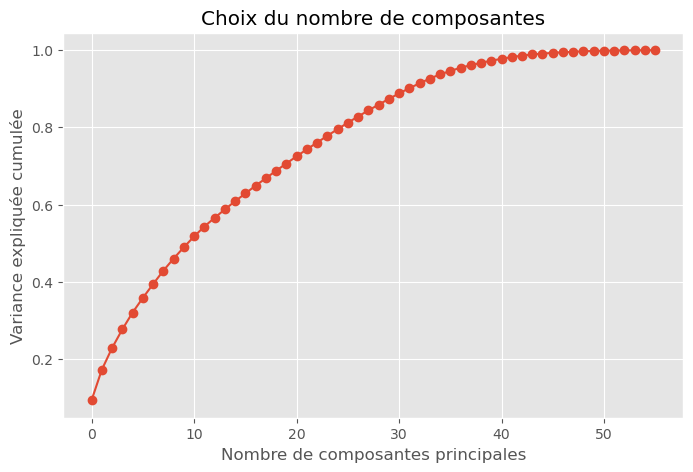

In [118]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Initialisation de l'ACP
pca = PCA()

# Ajustement aux données standardisées
X_pca = pca.fit_transform(X_scaled)

# Visualiser la proportion de variance expliquée par chaque composante
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.title('Choix du nombre de composantes')
plt.show()


In [119]:
# On conserve 90% de la variance
pca = PCA(n_components=0.90)
X_reduced = pca.fit_transform(X_scaled)

# Nombre de composantes retenues
print(f"Nombre de composantes principales retenues : {pca.n_components_}")

Nombre de composantes principales retenues : 32


In [122]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

# Transformation des données
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)        

# Appliquer la PCA
pca = PCA(n_components=0.90)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Entraîner Elastic Net
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000)  
elastic_net.fit(X_train_pca, y_train)

# Évaluer le modèle
train_score = elastic_net.score(X_train_pca, y_train)  
test_score = elastic_net.score(X_test_pca, y_test)    

print(f"R² sur l'entraînement : {train_score:.4f}")
print(f"R² sur le test : {test_score:.4f}")

R² sur l'entraînement : 0.4826
R² sur le test : 0.4564


In [126]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Pipeline avec standardisation et ACP
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.90)),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4))
])

# Validation croisée
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"R² moyen après ACP : {scores.mean():.4f}")

R² moyen après ACP : 0.6285


In [127]:
# Modèle de forêt aléatoire pour la régression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_pca, y_train)

# Prédictions
y_pred = rf_regressor.predict(X_test_pca)

# Évaluation
print("R² :", r2_score(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))

C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R² : 0.7893548259346969
RMSE : 0.5780315848147621


In [129]:
# Initialiser et entraîner le modèle SVM après ACP
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_model.fit(X_train_pca, y_train)

# Prédire sur le jeu de test
y_pred = svm_model.predict(X_test_pca)

# Évaluer les performances
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² :", r2_score(y_test, y_pred))

RMSE : 1.1483080618112194
R² : 0.16868579434749054


C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [130]:
# Définir le pipeline avec ACP et Forêt Aléatoire
pipeline = Pipeline([
    ('pca', PCA(n_components=10)),
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42))
])

# Ajuster le pipeline sur les données d'entraînement
pipeline.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = pipeline.predict(X_test)

# Évaluer les performances
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("R² :", r2)
print("RMSE :", rmse)
print("MAE :", mae)

C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R² : 0.5355715288306248
RMSE : 0.8582923284917104
MAE : 0.2667009253931205


Recherche des meilleurs paramètres pour le modèle 'Random Forest"

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import time

# Modèle de base
rf = RandomForestRegressor(random_state=42)

# Grille d'hyperparamètres enrichie
param_dist = {
    'n_estimators': [10, 50, 100, 200, 500],  
    'max_depth': [5, 10, 20, 50, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],  
    'bootstrap': [True, False]  
}

# Définir l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  
    cv=3,  
    scoring='r2',  
    verbose=1,  
    n_jobs=-1,  
    random_state=42
)


# Démarrer le chronomètre
start_time = time.time()

# Recherche aléatoire avec validation croisée
random_search.fit(X_train, y_train)

# Arrêter le chronomètre
end_time = time.time()

# Calculer le temps total d'exécution
execution_time = end_time - start_time

print(f"Temps d'exécution de RandomizedSearchCV : {execution_time:.2f} secondes")

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", random_search.best_params_)

# Meilleur modèle
best_rf = random_search.best_estimator_

# Affichage des 5 meilleures combinaisons
cv_results = pd.DataFrame(random_search.cv_results_)
top_5_results = cv_results.sort_values(by="mean_test_score", ascending=False).head(5)
print("Top 5 des combinaisons de paramètres :")
print(top_5_results[['mean_test_score', 'std_test_score', 'params']])

# Évaluation du meilleur modèle
y_pred = best_rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² du meilleur modèle : {r2:.4f}")
print(f"RMSE du meilleur modèle : {rmse:.4f}")
print(f"MAE du meilleur modèle : {mae:.4f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
18 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py", line 666, in _validate_par

Temps d'exécution de RandomizedSearchCV : 9.76 secondes
Meilleurs hyperparamètres : {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}
Top 5 des combinaisons de paramètres :
    mean_test_score  std_test_score  \
7          0.579698        0.077022   
5          0.577562        0.051258   
12         0.565369        0.075439   
3          0.533567        0.094148   
16         0.521797        0.137693   

                                               params  
7   {'n_estimators': 500, 'min_samples_split': 2, ...  
5   {'n_estimators': 100, 'min_samples_split': 2, ...  
12  {'n_estimators': 10, 'min_samples_split': 2, '...  
3   {'n_estimators': 50, 'min_samples_split': 2, '...  
16  {'n_estimators': 500, 'min_samples_split': 2, ...  
R² du meilleur modèle : 0.5737
RMSE du meilleur modèle : 0.8223
MAE du meilleur modèle : 0.1748


C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [136]:
from sklearn.model_selection import cross_val_score

# Validation croisée avec le meilleur modèle
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print("Scores de validation croisée :", cv_scores)
print("Moyenne du R² :", cv_scores.mean())

C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector 

Scores de validation croisée : [0.49555455 0.63867115 0.62520852 0.76278059 0.5560209 ]
Moyenne du R² : 0.6156471416973759


Recherche des features les plus importantes dans notre modèles. On pourra aussi vérifier si il n'y a pas une features qui capture toutes l'information.

In [139]:
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser et entraîner la forêt aléatoire
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extraire l'importance des caractéristiques
importances = rf_model.feature_importances_
feature_names = X.columns

# Créer un DataFrame pour les importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les résultats
print(importance_df)

C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                                  Feature    Importance
3                       NumberofBuildings  1.891092e-01
9          ThirdLargestPropertyUseTypeGFA  1.576634e-01
7               LargestPropertyUseTypeGFA  1.461732e-01
14                          EnergyDensity  9.562394e-02
8         SecondLargestPropertyUseTypeGFA  7.513262e-02
16                  NaturalGasPerTotalGFA  6.900779e-02
6                  PropertyGFABuilding(s)  6.383981e-02
11                     SiteEUIWN(kBtu/sf)  5.055522e-02
25              PrimaryPropertyType_Sante  3.275606e-02
15                 ElectricityPerTotalGFA  2.887039e-02
10                        ENERGYSTARScore  1.631901e-02
2                               YearBuilt  1.398222e-02
1                               Longitude  1.366650e-02
0                                Latitude  1.088698e-02
4                          NumberofFloors  8.263940e-03
12                   SourceEUIWN(kBtu/sf)  6.394955e-03
47                      Neighborhood_EAST  5.493

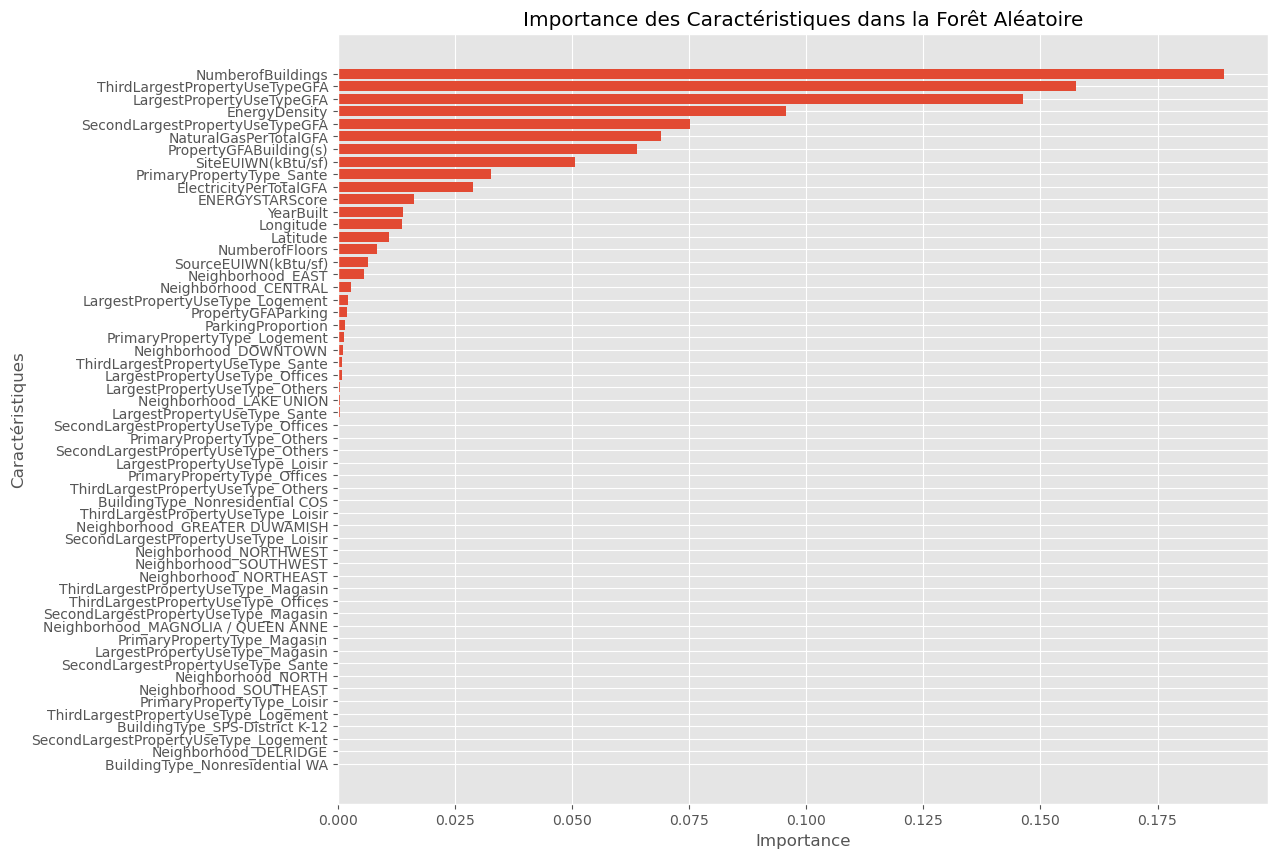

In [140]:
# Visualisation des importances des caractéristiques
plt.figure(figsize=(12, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Caractéristiques')
plt.title("Importance des Caractéristiques dans la Forêt Aléatoire")
plt.gca().invert_yaxis()  
plt.show()

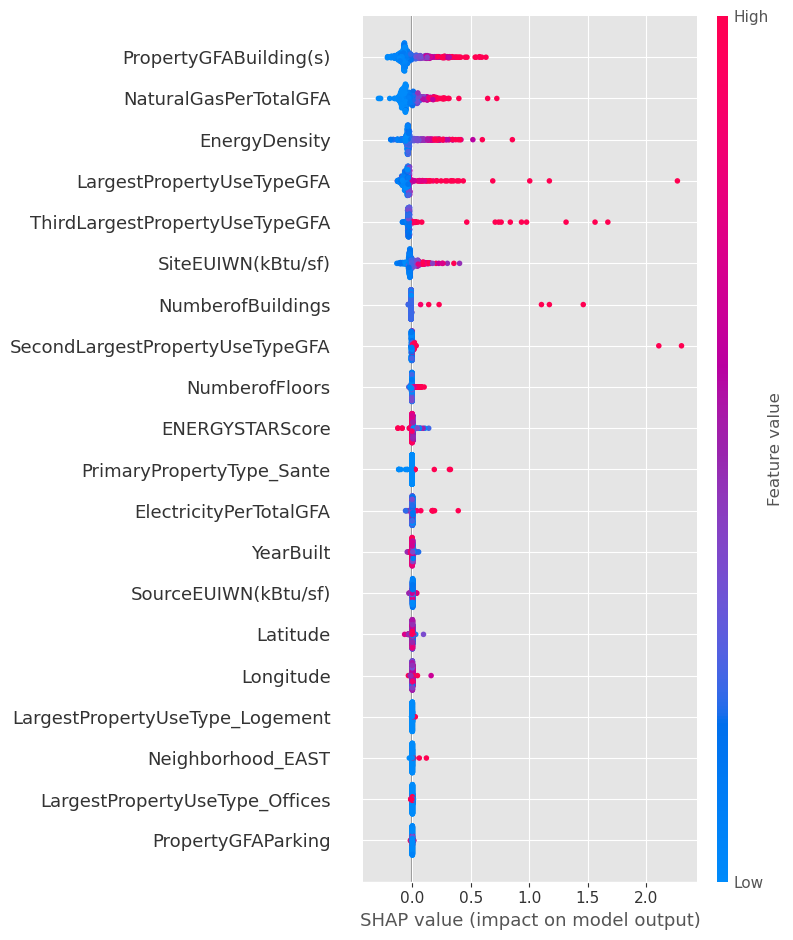

In [141]:
import shap

# Créer un explainer SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Visualisation globale avec SHAP
shap.summary_plot(shap_values, X_test)

In [142]:
# Sélectionner les 10 meilleures caractéristiques
top_10_features = importance_df.head(10)
X_top_10 = X[top_10_features['Feature'].values]

# Diviser les données avec les 10 meilleures caractéristiques
X_train_top10, X_test_top10, y_train_top10, y_test_top10 = train_test_split(
    X_top_10, y, test_size=0.3, random_state=42
)

# Initialiser et entraîner le modèle avec les 10 meilleures caractéristiques
rf_model_top10 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_top10.fit(X_train_top10, y_train_top10)

# Faire des prédictions
y_pred_top10 = rf_model_top10.predict(X_test_top10)

# Calculer les métriques
r2 = r2_score(y_test_top10, y_pred_top10)
mae = mean_absolute_error(y_test_top10, y_pred_top10)
rmse = np.sqrt(mean_squared_error(y_test_top10, y_pred_top10))

# Afficher les résultats
print(f"R² : {r2}")
print(f"MAE : {mae}")
print(f"RMSE : {rmse}")

C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R² : 0.6743257610030629
MAE : 0.11264292478611589
RMSE : 0.7187328855465591


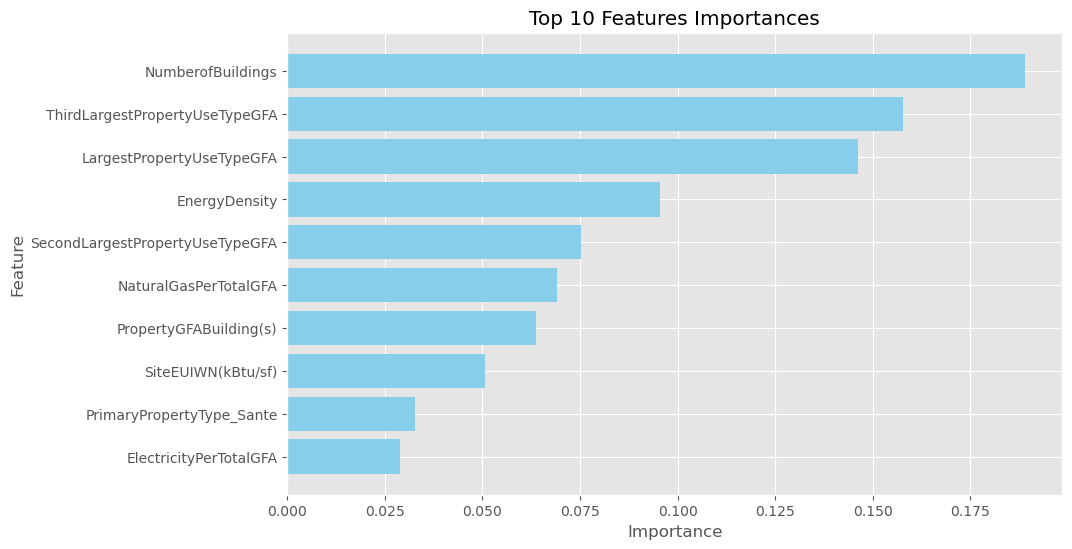

In [143]:
# Trier les 10 meilleures caractéristiques par importance
top_10_features = importance_df.head(10)

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Features Importances')
plt.show()

Occupons nous maintenant de l'impact d'ENERGYSTARScore dans notre modèle.

In [145]:
y = data[['TotalGHGEmissions']]
X_with_feature = data.drop(columns=['TotalGHGEmissions'])
X_without_feature = data.drop(columns=['ENERGYSTARScore'])

In [146]:
X_train_with, X_test_with, y_train, y_test = train_test_split(X_with_feature, y, test_size=0.2, random_state=42)
X_train_without, X_test_without, _, _ = train_test_split(X_without_feature, y, test_size=0.2, random_state=42)

In [147]:
# Modèle avec ENERGYSTARscore
model_with = RandomForestRegressor(n_estimators=100, random_state=42)
model_with.fit(X_train_with, y_train)
y_pred_with = model_with.predict(X_test_with)

# Modèle sans ENERGYSTARscore
model_without = RandomForestRegressor(n_estimators=100, random_state=42)
model_without.fit(X_train_without, y_train)
y_pred_without = model_without.predict(X_test_without)

C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\guill\OneDrive\Documents\OpenClassroom\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [148]:
# Avec ENERGYSTARscore
r2_with = r2_score(y_test, y_pred_with)
mae_with = mean_absolute_error(y_test, y_pred_with)
rmse_with = np.sqrt(mean_squared_error(y_test, y_pred_with))

# Sans ENERGYSTARscore
r2_without = r2_score(y_test, y_pred_without)
mae_without = mean_absolute_error(y_test, y_pred_without)
rmse_without = np.sqrt(mean_squared_error(y_test, y_pred_without))

# Afficher les résultats
print(f"Model with ENERGYSTARscore: R2={r2_with}, MAE={mae_with}, RMSE={rmse_with}")
print(f"Model without ENERGYSTARscore: R2={r2_without}, MAE={mae_without}, RMSE={rmse_without}")

Model with ENERGYSTARscore: R2=0.5693782901909354, MAE=0.1521815480725372, RMSE=0.9921028772600022
Model without ENERGYSTARscore: R2=0.8610225237530502, MAE=0.046753122955565954, RMSE=0.5636129446235907


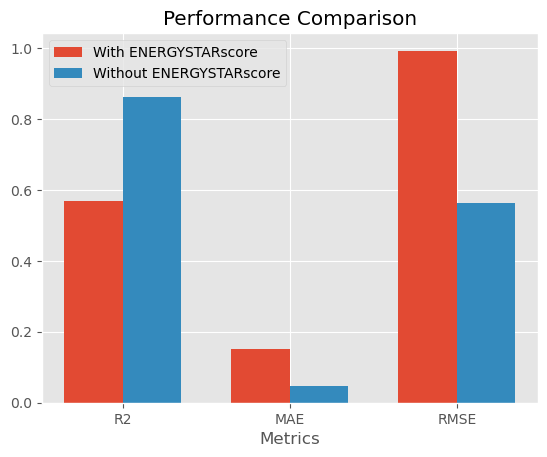

In [149]:
metrics = ["R2", "MAE", "RMSE"]
values_with = [r2_with, mae_with, rmse_with]
values_without = [r2_without, mae_without, rmse_without]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, values_with, width, label="With ENERGYSTARscore")
ax.bar(x + width/2, values_without, width, label="Without ENERGYSTARscore")

ax.set_xlabel("Metrics")
ax.set_title("Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

On observe facilement que retirer ENERGYSCOREStar améliore nettement notre modèle de machine learning.